<a href="https://colab.research.google.com/github/ESSI-Lab/dab-pynb/blob/main/dab-py_demo_his_central.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Welcome to the Jupyter notebook showing programmatically discovery and access of HIS-Central data**

This notebook is used to programmatically access HIS-Central DAB functionalities, in this case through the OGC OM-JSON based API, documented and available for tests also here: https://his-central.geodab.eu/gs-service/om-api


The HIS-central portal can also be used to help debug your python notebook: https://his-central.geodab.eu/gs-service/hisc/search.html

## **Step 1: Install dab-py**

The Python client library `dab-py` is available on PyPI and GitHub: https://github.com/ESSI-Lab/dab-py

In [3]:
!pip install --upgrade dab-py


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## **Step 2: GET Data (`Features` and `Observations`) Tutorial**

### **2.1: Import Library**
Import the main `dabpy` library to access HIS-Central API `om_api` functionalities.

In [3]:
from dabpy import HISCentralClient, Constraints
from IPython.display import display

### **2.2: Initialize HIS-Central Client (Token & View)**
Replace with your HIS-Central API token and 'his-central' view. This initializes the client to interact with the HIS-Central API.

As a prerequisite to obtain programmatically access to HIS-Central, a token is required. It can be obtained after registration with ISPRA.

In [ ]:
# Replace with your HIS-Central API token and optional view
from google.colab import userdata
token = userdata.get('token-his-central')  # replace with your actual token
view = "his-central"
client = HISCentralClient(token=token, view=view)

### **2.3: Define Feature Constraints**
Feature retrieval in the HIS-Central API can be restricted using optional `Constaints()`.

#### 2.3.1: Default: Spatial Constraints *(bounding box)*  
Set the geographic bounding box for spatial queries. The example uses a region in Tuscany.

In [5]:
# Define bounding box coordinates (south, west, north, east)
south = 42.425
west = 9.844
north = 43.981
east = 11.625

In this example, only spatial constraints (bounding box) are applied, while the other filters remain optional.

In [6]:
# Create feature constraints
constraints = Constraints(bbox = (south, west, north, east))

#### 2.3.2: Optional: Other Constraints
Additional optional constraints can be applied to further filter the results: 
- **Observed property** : filter features based on the type of measurement or variable, such as water level, precipitation, discharge, etc. 
- **Ontology**          : specify which ontology to use to expand the observed property search term or URI with synonyms and related narrower concepts. Two ontologies are available: `whos` and `his-central`.
- **Country**           : using Country code (ISO3).
- **Provider**          : data provider identifier.
- The other constraints are listed from the documented API https://his-central.geodab.eu/gs-service/om-api/

If optional constraints are specified, update the code with detail constraints:

In [ ]:
# You can also specify additional constraints as needed, for example:
'''
constraints = Constraints(
    bbox = (south, west, north, east),
    observedProperty = "example_property",
    ontology = "example_ontology",
    country = "example_country",
    provider = "example_provider",
    spatialRelation = "example_spatial_relation",
    feature = "example_feature_id",                       # can also use features[index_number].id directly
    localFeatureIdentifier = "example_local_id",
    observationIdentifier = "example_obs_id",
    beginPosition = "2025-01-01T00:00:00Z",
    endPosition = "2025-02-01T00:00:00Z",
    predefinedLayer = "example_layer",
    timeInterpolation = "example_interpolation",
    intendedObservationSpacing = "PT1H",                  # ISO 8601 duration, e.g., 1 hour
    aggregationDuration = "P1D",                          # ISO 8601 duration, e.g., 1 day
    limit = "10",                                         # by default, it will only gives the first 10 data entries, if you want more, specify here.
    format = "format_type"                                # specify the format type if needed, e.g., "NetCDF", "GeoTIFF", etc.
)
'''

'\nconstraints = Constraints(\n    bbox = (south, west, north, east),\n    observedProperty = "example_property",\n    ontology = "example_ontology",\n    country = "example_country",\n    provider = "example_provider",\n    spatialRelation = "example_spatial_relation",\n    feature = "example_feature_id",  #can also use features[index_number].id directly\n    localFeatureIdentifier = "example_local_id",\n    observationIdentifier = "example_obs_id",\n    beginPosition = "2025-01-01T00:00:00Z",\n    endPosition = "2025-02-01T00:00:00Z",\n    predefinedLayer = "example_layer",\n    timeInterpolation = "example_interpolation",\n    intendedObservationSpacing = "PT1H",  # ISO 8601 duration, e.g., 1 hour\n    aggregationDuration = "P1D"  # ISO 8601 duration, e.g., 1 day\n)\n'

In this example, we use other constraints such as Observed Property and Ontology, so the constraints would be:

In [7]:
full_constraints =  Constraints(
    bbox = (south, west, north, east),
    observedProperty = "livello",
    ontology = "his-central"
)

### **2.4: Get `Features`**

#### 2.4.1: Retrieve features as Python objects
Fetch features from the HIS-Central API URL as Python `Feature` objects using the previously defined full_constraints.

In [8]:
# 01.1.1: Get Features as Python objects
features = client.get_features(full_constraints)

Retrieving page 1: https://his-central.geodab.eu/gs-service/services/essi/token/***/view/his-central/om-api/features?west=9.844&south=42.425&east=11.625&north=43.981&observedProperty=livello&ontology=his-central
Returned first 10 features (not completed, more data available).
Use .next() to move to the next page.


The retrieved **features** are stored in a `FeaturesCollection`.  
Then convert the current page to a Pandas DataFrame for easier inspection and analysis.then converted into a Pandas DataFrame for easier inspection, filtering, and analysis.

In [9]:
# 01.1.2: (optional: Convert Features to DataFrame if needed)
features_df = features.to_df()
display(features_df)

,ID,Name,Coordinates,Source,Identifier,Contact Name,Contact Email
0,000777533B7C1AE90F783B87E98A60288F1D534B,ASA 34,"10.4996018448, 43.6238000685",Regione Toscana,TOS19000650,,
1,0088B2100397704EF0F749980C75411A3F011139,S. Piero a Sieve-Carza,"11.3223473976022, 43.9590577674834",Regione Toscana,TOS01004623,,
2,00A0C56B2595EBB08798BC00DC6C787B76EFA97E,Piez. Guardamare,"10.549, 43.07805",Regione Toscana,TOS29000027,,
3,00A6A0C1B93247FB96D25F1BFBC017683469FA89,SP Lodano,"10.724056583658, 43.1115868263753",Regione Toscana,TOS01005461,,
4,0161FD29573348C2E060AFDC730CA3C5BAC0FE31,Dep. Cascina,"10.488076258, 43.6750749442",Regione Toscana,TOS19000646,,
5,0176D33D89C6555801C137622D7AE3BF7C9C59F1,Capannoli,"10.6844192154688, 43.5922849536088",Regione Toscana,TOS01005131,,
6,01D93E455BE1A3D889B9ABC1D6ED7EA32BAF24C4,S. Caterina,"10.6797067853, 43.0380480392",Regione Toscana,TOS19000640,,
7,03876FBA646FF3E0694A6A02D9BD382ECF4DA5DA,Ponsacco,"10.6339877843492, 43.6198249873421",Regione Toscana,TOS01005151,,
8,0704017DAC4E2E4CEDB41F1047CE672C2E7CA156,RMS 51,"10.31382, 43.6225",Regione Toscana,TOS29000037,,
9,07F3C2F28BE6766FCA131C64E40575713362B399,Solvay,"10.433052778244, 43.3822165515063",Regione Toscana,TOS20000001,,


#### 2.4.2: (If needed / more data exists) Fetch the next page
If the dataset is **not completed** (contains more than 10 datas) - like the above data, fetch the next page using `.next()`

In [10]:
# 01.2.1: Fetch next page (if available).
nextFeatures = features.next()

# 01.2.2: (optional) Convert current page features to DataFrame.
nextFeatures_df = nextFeatures.to_df()   
display(nextFeatures_df)

Retrieving page 2: https://his-central.geodab.eu/gs-service/services/essi/token/***/view/his-central/om-api/features?west=9.844&south=42.425&east=11.625&north=43.981&observedProperty=livello&ontology=his-central&resumptionToken=07F3C2F28BE6766FCA131C64E40575713362B399
Returned next 10 features (not completed, more data available).
Use .next() to move to the next page.


,ID,Name,Coordinates,Source,Identifier,Contact Name,Contact Email
0,07F926B0E860AA425A6A8686958C932BC06DE052,Pozzo Aquilani,"11.04179, 42.7973",Regione Toscana,TOS29000021,,
1,0813A76BE64F18A3475D32E0BCF5FBA377BE1C05,Ansedonia,"11.2739, 42.425181",Regione Toscana,TOS03003118,,
2,093C3B7132DC0C6134887B39779AD0DD6499D519,Greve,"11.3181649633615, 43.5830491563275",Regione Toscana,TOS01004705,,
3,096D5DF5CAFB9AE1D66CC665128E0BF02E617FA2,Cefalonia,"10.90188, 43.69196",Regione Toscana,TOS29000017,,
4,0A14EEBCA1B0CC717CFC8DDD0DA5F8CEAABACA08,ASA34 bis,"10.4996018448, 43.6238000685",Regione Toscana,TOS19000674,,
5,0A3919911F608AB448F5C7675BD68D9B1EB2376D,I.T.I.S. S. G. Valdarno,"11.524832188382485, 43.57281724006117",Regione Toscana,TOS29000009,,
6,0ABE14136DAA1159663A68E5392D0E537AB16025,Steccaia sub,"10.576482195716, 43.337058572674",Regione Toscana,TOS19000672,,
7,0E19236128494A54731A56977620F97B86FB57BC,Fornacina 2 ul,"11.4676053131335, 43.8012359149854",Regione Toscana,TOS01004642,,
8,0E2FC54AE483E64BC8529905C338D2E117209F1C,Vecchia SS Aurelia,"10.6139630729366, 43.0190101380753",Regione Toscana,TOS01005489,,
9,0EBB60C9574C38335685775CB12DDA2BBDDD079F,Montioncello,"10.62937, 43.02912",Regione Toscana,TOS29000011,,


### **2.5: Get `Observations`**

#### 2.5.1: Retrieve observations as Python objects (using previous constraints)

In this part, the constraints are automatically inherited from Step 2.3, the same as those used for `GET Features`, which is *full_constraints*.

If the dataset is not completed (contains more than 10 datas), fetch the next page using `.next()` *(see Step 2.4.2)*.

In [11]:
# 02.1.1: Retrieve observations matching the previously defined constraints (full_constraints).
observations = client.get_observations(full_constraints)

Retrieving page 1: https://his-central.geodab.eu/gs-service/services/essi/token/***/view/his-central/om-api/observations?west=9.844&south=42.425&east=11.625&north=43.981&observedProperty=livello&ontology=his-central
Returned first 10 observations (not completed, more data available).
Use .next() to move to the next page.


The retrieved **observations** are then converted into a Pandas DataFrame for easier inspection, filtering, and analysis.

In [12]:
# 02.1.2: (optional: Convert Observations to DataFrame if needed)
observations_df = observations.to_df()
display(observations_df)

,ID,Source,Observed Property,Phenomenon Time Begin,Phenomenon Time End
0,36398E66637A68B7916FC5305370E2992CCB3AB2,Regione Toscana,"Level, stream",2005-01-01T00:00:00Z,2026-01-19T09:43:50Z
1,24EF9B88C58C323FA1F53485E697BBCF097CEB5E,Regione Toscana,"Level, stream",2002-01-01T00:00:00Z,2026-01-19T09:43:50Z
2,749ED88CE0E8A24BA91B5F072480CE223D09CD73,Regione Toscana,"Level, stream",2010-11-01T00:00:00Z,2026-01-19T09:43:50Z
3,4DC751A98442F42E28DC0EED52BABF746A1989CC,Regione Toscana,"Level, stream",2007-01-01T00:00:00Z,2026-01-19T09:43:50Z
4,B3CB7DA5D0CFBF1727CB2E0E8886F2AF6CF3D6BE,Regione Toscana,"Level, stream",2007-01-01T00:00:00Z,2026-01-19T09:43:50Z
5,475FE7030125586C8D1EE91BD0B73F84AC5FA587,Regione Toscana,"Level, stream",1998-01-01T00:00:00Z,2026-01-19T09:43:50Z
6,6ECF7EE2764B145640CAC7D4EF4DF9EE25AFA39E,Regione Toscana,"Level, stream",1965-01-01T00:00:00Z,1996-12-31T00:00:00Z
7,8AB7FC3EA843D00CC53D87FA2A3398ADE23443CE,Regione Toscana,"Level, stream",2006-01-01T00:00:00Z,2011-12-31T00:00:00Z
8,535D2750E5839E426055F56F93C494C2BFBE7696,Regione Toscana,"Level, stream",2008-01-01T00:00:00Z,2026-01-19T09:43:50Z
9,8D40F4B97CFAF58D8020064081B5CB83DB37F548,Regione Toscana,"Level, stream",2011-01-01T00:00:00Z,2026-01-19T09:43:50Z


#### 2.5.2: Retrieve observations as Python objects (using new constraints)

Define a new set of constraints (`new_constraints`) to retrieve observations.  
In this example, retrieve observations for a specific feature (station).
There are two ways to specify the feature ID:
  1. Directly provide the ID as a string, e.g.:  
     ```python
     feature="03876FBA646FF3E0694A6A02D9BD382ECF4DA5DA"
     ```
  2. Extract the ID from a previously retrieved features list, e.g.:   
     ```python
     feature=features[7].id
     ```
     - `features[7]` → selects the 10th feature (station) in the list (index 9)  
     - `.id` → accesses its unique identifier, required by the API

In [13]:
# 02.2.1: (or) retrieve observations from a different constraints - by defining new_constraints.
new_constraints = Constraints(feature=features[7].id)
observations_new_constraints = client.get_observations(new_constraints)

Retrieving page 1: https://his-central.geodab.eu/gs-service/services/essi/token/***/view/his-central/om-api/observations?feature=03876FBA646FF3E0694A6A02D9BD382ECF4DA5DA
Returned first 3 observations (completed, data finished).


The retrieved **observations** are then converted into a Pandas DataFrame for easier inspection, filtering, and analysis.

In [14]:
# 02.2.2: (optional: Convert Observations to DataFrame if needed)
observations_new_constraints_df = observations_new_constraints.to_df()
display(observations_new_constraints_df)

,ID,Source,Observed Property,Phenomenon Time Begin,Phenomenon Time End
0,48383EFD9FA3C29D1BBC61C77F489E266C89DBEB,Regione Toscana,"Flux, discharge",2022-01-01T00:00:00Z,2023-12-31T00:00:00Z
1,535D2750E5839E426055F56F93C494C2BFBE7696,Regione Toscana,"Level, stream",2008-01-01T00:00:00Z,2026-01-19T09:44:00Z
2,C8DDF8A27118EA4E82B5F9D3318EC6BF640D7F41,Regione Toscana,Precipitation,2012-01-02T09:00:00Z,2012-06-02T09:00:00Z


### **2.6: Get the Data Points**
#### 2.6.1: Retrieve Observation With Data Points

Retrieve the full time-series data for a selected observation within a specified time range. It shows the actual code that retrieves the data, to separate the action (API call) from what to do next with the data.

In [15]:
# 03.1: Get first observation with data points
obs_with_data = client.get_observation_with_data(observations_new_constraints[1].id, begin="2025-01-01T00:00:00Z", end="2025-02-01T00:00:00Z")

Retrieving https://his-central.geodab.eu/gs-service/services/essi/token/***/view/his-central/om-api/observations?includeData=true&observationIdentifier=535D2750E5839E426055F56F93C494C2BFBE7696&beginPosition=2025-01-01T00%3A00%3A00Z&endPosition=2025-02-01T00%3A00%3A00Z


#### 2.6.2: (optional) Convert to DataFrame for analysis

The returned data can be plotted or further analyzed as needed.

In [16]:
# 03.2: (optional: Convert Observation Points to DataFrame if needed)
obs_points_df = client.points_to_df(obs_with_data)
display(obs_points_df)

,Time,Value
0,2025-01-01T00:00:00Z,0.95
1,2025-01-02T00:00:00Z,0.94
2,2025-01-03T00:00:00Z,0.98
3,2025-01-04T00:00:00Z,0.96
4,2025-01-05T00:00:00Z,0.97
5,2025-01-06T00:00:00Z,0.97
6,2025-01-07T00:00:00Z,0.99
7,2025-01-08T00:00:00Z,1.01
8,2025-01-09T00:00:00Z,0.97
9,2025-01-10T00:00:00Z,0.95


#### 2.6.3: (Optional) Example of Graphical Time-Series
This step demonstrates visualization, which is a different action from simply retrieving or tabulating data.  

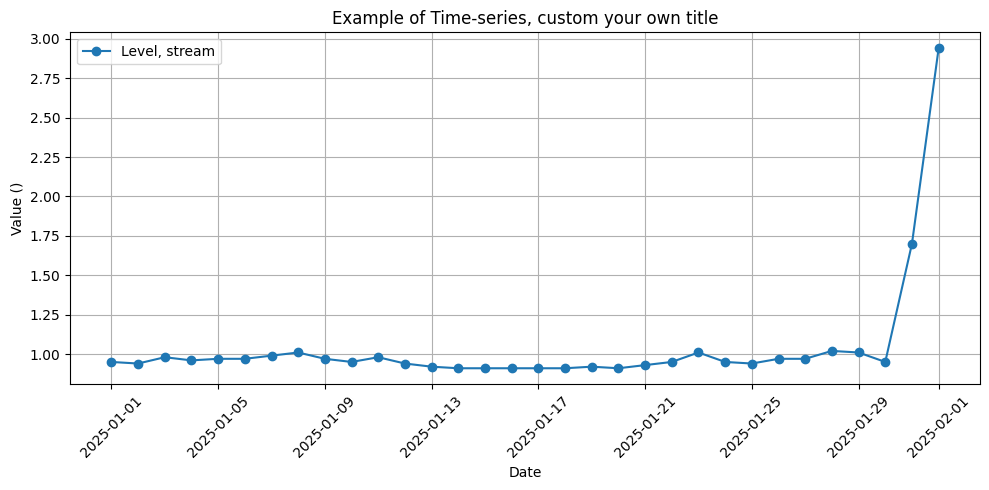

In [17]:
# 03.3: (optional: Example of Graphical Time-Series)
client.plot_observation(obs_with_data, "Example of Time-series, custom your own title")

## **Step 3: DOWNLOAD Data Obsevations Tutorial**

### **3.1: Import Library**
Import the main `dabpy` library to access HIS-Central API `om_api` functionalities.

In [4]:
from dabpy import HISCentralClient, DownloadConstraints
from IPython.display import display

### **3.2: Initialize HIS-Central Client (Token & View)**
Replace with your HIS-Central API token and 'his-central' view. This initializes the client to interact with the HIS-Central API.

As a prerequisite to obtain programmatically access to HIS-Central, a token is required. It can be obtained after registration with ISPRA.

In [ ]:
# The code is similar like the one on Step 2.2.
# Replace with your HIS-Central API token and optional view
token = userdata.get('token-his-central')  # replace with your actual token
view = "his-central"
client = HISCentralClient(token=token, view=view)

### **3.3: Define The Constraints**
Downloads in the HIS-Central API can be restricted using optional constraints, which is `DownloadConstraints()`.

It includes all the parameters such as in `Constraints()` with some additional parameters for class Downloads.

#### 3.3.1: Default: Spatial Constraints *(bounding box)*  
Set the geographic bounding box for spatial queries. The example uses a small area in Rome, Italy.

In [6]:
# Define bounding box coordinates (south, west, north, east)
south_2 = 41.777
west_2 = 12.392
north_2 = 41.832
east_2 = 12.456

Here, we use `DownloadConstraints()` with some specific additional parameters for downloads.

In general, the parameter **asynchDownloadName** is mandatory - to name the downloaded file.

In [11]:
download_constraints = DownloadConstraints(
    bbox = (south_2, west_2, north_2, east_2),
    # if use from previous define constraints --> base_constraints = constraints,
    asynchDownloadName = "download_example-2" # Name the downloaded file is mandatory
)

#### 3.3.2: Optional: Other DownloadConstraints
Additional optional `DownloadConstraints` can be applied to further filter the results: 
- **Base Constraints** :  Reuse previously defined `Constraints()` (e.g., spatial, temporal, or observedProperty filters) - like on the Step 2.3.2.
- **asynchDownloadName** : Specify a custom name for the asynchronous download file.
- **eMailNotificationsy**: Set 'True' or 'False' to receive email notifications about the download process.
- **useCache**: 
- The other constraints are listed from the documented API https://his-central.geodab.eu/gs-service/om-api/

In [8]:
'''abs
download_constraints = DownloadConstraints(
    base_constraints = constraints,            # Can also use previously defined constraints.
    asynchDownloadName = "file_name_here",     # Mandatory: name of the download file
    eMailNotifications = "True",               # Optional: set to 'True' to receive email notification when download is ready, 'False' otherwise.
    useCache = "True"                          # Optional: set to 'True' to use cached data if available, 'False' otherwise.
)
'''

'abs\ndownload_constraints = DownloadConstraints(\n    base_constraints = constraints,            # Can also use previously defined constraints.\n    asynchDownloadName = "file_name_here",     # Mandatory: name of the download file\n    eMailNotifications = "True",               # Optional: set to \'True\' to receive email notification when download is ready, \'False\' otherwise.\n    useCache = "True"                          # Optional: set to \'True\' to use cached data if available, \'False\' otherwise.\n)\n'

### **3.4: PUT – Create Download**

After defining your `DownloadConstraints`, the next step is to **create a download request on the HIS-Central server**.

This is done using the `create_download()` method, which sends a **PUT request** to the server.

In [23]:
'''--------- 01 PUT: Create Download ---------'''
# 01.01: PUT: Create Download
create_resp = client.create_download(download_constraints)

DOWNLOAD URL: https://his-central.geodab.eu/gs-service/services/essi/token/***/view/his-central/om-api/downloads?west=12.392&south=41.777&east=12.456&north=41.832&asynchDownloadName=download_example
File "download_example" is Submitted.
ID = "alun.putra@edu.unifi.it:a93a169d-c927-4fbe-afce-b899e87822de"


Key points:

- The `asynchDownloadName` you specified in `DownloadConstraints` is used as the filename on the server.  
- If the data is large, the download is performed asynchronously, meaning the server prepares the file in the background.  
- You can optionally use `create_save_download()` to create and immediately save the download locally, which combines the creation and retrieval steps into one.

In [ ]:
# 01.02: Optional: Create and Save Automatically (combines PUT + immediate SAVE)
create_save_resp = client.create_save_download(download_constraints)

DOWNLOAD URL: https://his-central.geodab.eu/gs-service/services/essi/token/***/view/his-central/om-api/downloads?west=12.392&south=41.777&east=12.456&north=41.832&asynchDownloadName=download_example-2
File "download_example-2" is Submitted.
ID = "alun.putra@edu.unifi.it:57b74348-b193-445d-80d2-4f11975c8970"
Status: Submitted ⟶ Started ⟶ Downloading... ⟶ Completed
Download link: https://his-central.s3.us-east-1.amazonaws.com/data-downloads/download_example-2.zip
Download complete!
File saved to: C:\Users\Alun\Downloads\download_example-2.zip


By default, the local file saved by `create_save_download()` will use the same name as the `asynchDownloadName` you assigned in `DownloadConstraints`.

If you want to customize the local filename, you can pass the `filename` parameter, for example:
> ```python
> client.create_save_download(download_constraints, filename="my_custom_file.zip")
> ```

This will save the downloaded file locally as `"my_custom_file.zip"` instead of the default.

### **3.5: GET – Check Status and Save Downloaded List**

Once the download is created, it may take some time for the server to prepare the data, especially for large datasets.  

The `get_download_status()` method allows you to **check the status of your download**.  +

In [14]:
'''--------- 02 GET: Check Status of Downloaded List ---------'''
# 02.01: GET: Check Status of Downloaded List
download_id = "alun.putra@edu.unifi.it:a93a169d-c927-4fbe-afce-b899e87822de"  # replace with your actual download ID, or set None to list all your downloads.
status_resp = client.get_download_status(download_id)

STATUS URL: https://his-central.geodab.eu/gs-service/services/essi/token/***/view/his-central/om-api/downloads?id=***%3Aa93a169d-c927-4fbe-afce-b899e87822de


> **Tip:**  Use `display(status_resp.to_df())` to view the status as a neat table. This is useful if you have multiple concurrent downloads.

In [15]:
display(status_resp.to_df())

,File Name,ID,Status,Download Link,Size (in MB),Timestamp
0,download_example,alun.putra@edu.unifi.it:a93a169d-c927-4fbe-afce-b899e87822de,Completed,https://his-central.s3.us-east-1.amazonaws.com/data-downloads/download_example.zip,0.01,2026-01-19T09:47:22Z


Key point: `download_id` identifies the specific download request. If set to `None`, it lists all your downloads on the server.  
> ```python
> download_id = None
> ```

In [17]:
# 02.02: Optional: Save the Downloaded File Locally
save_resp = client.save_download(download_id, filename = "name-the-file-manually.zip")

Download complete!
File saved to: C:\Users\Alun\Downloads\name-the-file-manually.zip


### **3.6: DELETE – Remove Download by ID**

After the download is completed and saved locally, you may want to **clean up your downloads on the server**.  
The `delete_download()` method removes a specific download by its ID.


In [18]:
'''--------- 03 DELETE: Delete by ID ---------'''
# 03.01: DELETE: Delete by ID
delete_resp = client.delete_download(download_id)
print(delete_resp)

Deleting ID "alun.putra@edu.unifi.it:a93a169d-c927-4fbe-afce-b899e87822de" ...
DELETE URL: https://his-central.geodab.eu/gs-service/services/essi/token/***/view/his-central/om-api/downloads?id=***%3Aa93a169d-c927-4fbe-afce-b899e87822de"
ID = alun.putra@edu.unifi.it:a93a169d-c927-4fbe-afce-b899e87822de | status = deleted


Key points:

- This is useful to **free up server space** and avoid cluttering your account with old downloads.  
- You can safely delete downloads after saving them locally.  
- If `download_id` is `None`, make sure you select the correct download ID from the status list to avoid deleting unintended files.

> **Tip:** Always confirm the ID before deletion, especially if multiple downloads are active.

## **Step 4: Full Code**

This part contains the complete working example from steps 2.1–2.6.

It can be run as a single block to reproduce all results.

```python
# ----------------------------
# 1. GET DATA (FEATURES AND OBSERVATIONS)
# ----------------------------

from dabpy import HISCentralClient, Constraints
from IPython.display import display

# Replace with your HIS-Central API token and optional view
token = "my-token"  # replace with your actual token
view = "his-central"
client = HISCentralClient(token=token, view=view)


## 00 DEFINE FEATURE CONSTRAINTS
# Define bounding box coordinates (south, west, north, east), example of Finland.
south = 42.425
west = 9.844
north = 43.981
east = 11.625
# Create feature constraints, only spatial constraints are applied, while the other filters remain optional.
constraints = Constraints(bbox = (south, west, north, east))
# Example where other contraints applied.
full_constraints =  Constraints(
    bbox = (south, west, north, east),
    observedProperty = "livello",
    ontology = "his-central"
)

## 01 GET FEATURES
# 01.1.1: Retrieve features matching the previously defined constraints (full_constraints).
features = client.get_features(full_constraints)
# 01.1.2: (optional: Convert Features to DataFrame if needed).
features_df = features.to_df()
display(features_df)

'''
--- Use next() only to fetch all the pages ---
# 01.2.1: # Fetch next page (if available).
nextFeatures = features.next()
# 01.2.2: (optional) Convert current page features to DataFrame.
nextFeatures_df = nextFeatures.to_df()   
display(nextFeatures_df)
'''

## 02 GET OBSERVATIONS
# 02.1.1: Retrieve observations matching the previously defined constraints (full_constraints).
observations = client.get_observations(full_constraints)

# 02.1.2: (optional: Convert Observations to DataFrame if needed)
observations_df = observations.to_df()
display(observations_df)

# 02.2.1: (or) retrieve observations from a different constraints - by defining new_constraints.
new_constraints = Constraints(feature=features[7].id)
observations_new_constraints = client.get_observations(new_constraints)

# 02.2.2: (optional: Convert Observations to DataFrame if needed)
observations_new_constraints_df = observations_new_constraints.to_df()
display(observations_new_constraints_df)


## 03 GET DATA POINTS
# 03.1: Get first observation with data points
obs_with_data = client.get_observation_with_data(observations_new_constraints[1].id, begin="2025-01-01T00:00:00Z", end="2025-02-01T00:00:00Z")
# 03.2: (optional: Convert Observation Points to DataFrame if needed)
obs_points_df = client.points_to_df(obs_with_data)
display(obs_points_df)
# 03.3: (optional: Example of Graphical Time-Series)
client.plot_observation(obs_with_data, "Example of Time-series, custom your own title")

```python
# ----------------------------
# 2. DOWNLOAD DATA OBSERVATIONS (APPLICABLE ONLY FOR HIS-CENTRAL SERVER *AT THE MOMENT*)
# ----------------------------

from dabpy import *
from IPython.display import display

# Replace with your token and 'his-central' view
token = "my-token"  # replace with your actual token
view = "his-central" # only 'his-central' at the moment
client = DABClient(token=token, view=view)

'''--------- 00 DEFINE THE CONSTRAINTS ---------'''
# 00.1: Define bounding box coordinates (or you can use from previous one)
south_2 = 41.777
west_2 = 12.392
north_2 = 41.832
east_2 = 12.456
# 00.2: Create New DownloadConstraints
download_constraints = DownloadConstraints(
    bbox = (south_2, west_2, north_2, east_2),
    # if use from previous define constraints --> base_constraints = constraints,
    asynchDownloadName = "download_example" # Name the downloaded file is mandatory
)

'''--------- 01 PUT: Create Download ---------'''
# 01.01: PUT: Create Download
create_resp = client.create_download(download_constraints)
# 01.02: Optional: Create and Save Automatically
create_save_resp = client.create_save_download(download_constraints, filename = None)

'''--------- 02 GET: Check Status of Downloaded List ---------'''
# 02.01: GET: Check Status of Downloaded List
download_id = None
status_resp = client.get_download_status(download_id)
display(status_resp.to_df())
# 02.02: Optional: Save the Downloaded File Locally
save_resp = client.save_download(download_id, filename = None)

'''--------- 03 DELETE: Delete by ID ---------'''
# 03.01: DELETE: Delete by ID
delete_resp = client.delete_download(download_id)
print(delete_resp)